In [4]:
import pandas as pd
from sklearn.metrics import classification_report
import shap
from aux_functions import load_and_preprocess_data_5
from aux_voting import voting_classification
import pickle

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data = load_and_preprocess_data_5().drop('id_discente',axis=1)
labels = {0: '1. Evasão no\n primeiro ano',
          1: '2. Evasão no\n segundo ano',
          2: '3. Não evasão até\n o segundo ano', 
          }


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    2234
1    2234
2    2234
Name: situacao_final_discente, dtype: int64


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [7]:
voting_classifier, X_train, X_test, y_test, y_pred, y_prob = voting_classification(data, labels, '5')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


<Figure size 640x480 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [8]:
with open('5/voting/voting_classifier.pickle', 'wb') as file:
    pickle.dump(voting_classifier, file)

In [9]:
print(classification_report(y_test, y_pred, digits=6, target_names=['1. Evasão no primeiro ano', '2. Evasão no segundo ano', '3. Não evasão até o segundo ano']))

                                 precision    recall  f1-score   support

      1. Evasão no primeiro ano   0.787293  0.821326  0.803949       694
       2. Evasão no segundo ano   0.654514  0.576453  0.613008       654
3. Não evasão até o segundo ano   0.722925  0.775264  0.748180       663

                       accuracy                       0.726504      2011
                      macro avg   0.721577  0.724347  0.721713      2011
                   weighted avg   0.722891  0.726504  0.723467      2011



X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/5 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

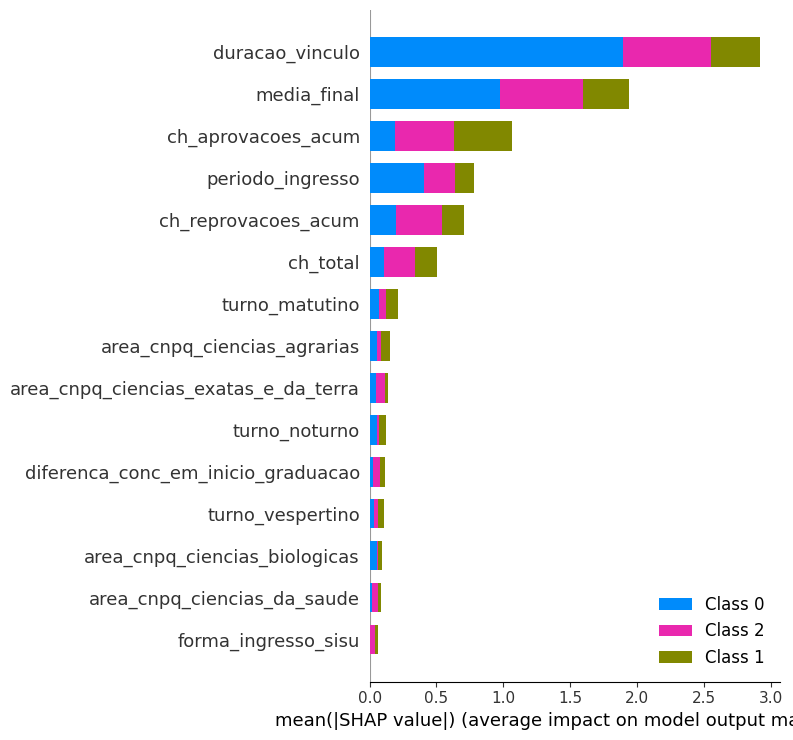

In [10]:
background_summary = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(voting_classifier.predict_proba, background_summary, link="logit")
shap_values = explainer.shap_values(X_test.loc[0:4])
shap.summary_plot(shap_values, X_test.loc[0:4], max_display=15)